# Úloha 3: Částice v kruhové potenciálové jámě

*integrace, kořeny funkce*

Částice se pohybuje v nekonečně hluboké kruhové potenciálové jámě ve dvou dimenzích. Najděte energii
$E = k^2$ prvních tří vázaných stavů částice s nulovým momentem hybnosti v této jámě řešením rovnice

$$
\psi(a) = J_0(ka) = 0,
$$

kde $a = 1$ je poloměr jámy. Besselova funkce $J_n(kr)$, kde
$r = \sqrt{x^2 + y^2}$, je radiální částí řešení Schrödingerovy rovnice ve dvou dimenzích a dá se spočíst z její integrální reprezentace

$$
J_0(z) = \frac{1}{2\pi} \int_{-\pi}^{\pi} \cos(z \cos x)\, dx.
$$

## Úkoly

- Integrál pro nalezení Besselovy funkce spočtěte pomocí lichoběžníkového pravidla.  
  Otestujte rychlost konvergence integrálu a nakreslete graf chyby určení integrálu v log–log škále.



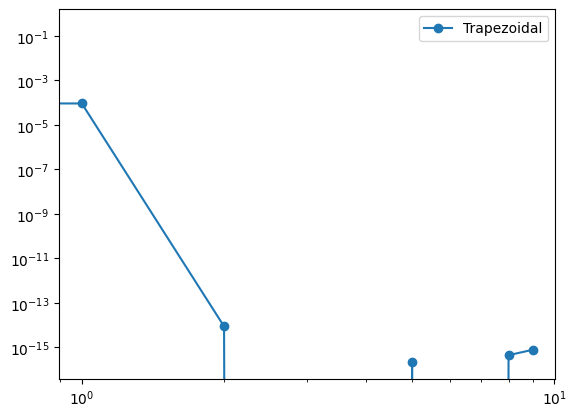

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def trapezoidal(f, x):
    h = (x[-1]-x[0])/(len(x)-1)
    intt = sum([f[i] for i in range(1, len(x)-1)])
    last = (f[0]+f[-1])/2
    return h*(intt + last)

def licho(z, n):
    x = np.linspace(-np.pi, np.pi, n)
    f = np.cos(z * np.cos(x))
    return (1/(2*np.pi)) * trapezoidal(f, x)

def np_trap(z, n):
    x = np.linspace(-np.pi, np.pi, n)
    f = np.cos(z * np.cos(x))
    return ((1/(2*np.pi)) * np.trapezoid(f, x))
n = 100
z = 1.143    
mantra = np_trap(z, n)
conv = [licho(z, 2**i) for i in range(1,15)]

plt.loglog(np.abs(conv-mantra), 'o-', label="Trapezoidal")

plt.legend()
plt.show()



- Na základě analýzy rychlosti konvergence zvolte vhodný počet kvadraturních bodů, který použijete pro hledání kořenů Besselovy funkce aplikací vhodné numerické metody.

- Najděte co nejpřesněji hledané energie vázaných stavů.

## Výstup

Výstupem bude:
- grafické znázornění konvergence integrálu v reprezentaci Besselovy funkce,
- graf Besselovy funkce $J_0(k)$ pro odhad polohy kořenů,
- číselné hodnoty energií tří nejnižších vázaných stavů včetně vašeho odhadu přesnosti výpočtu.

In [56]:
zs = np.linspace(0.01, 10, 1000)


e_lvl = [(licho(z, n),z) for z in zs]
closest_three = sorted(e_lvl, key=lambda p: abs(p[0] - 0))[:3]
b_values = [p[1] for p in closest_three]
print(sorted(b_values))

[np.float64(5.52), np.float64(8.65), np.float64(8.66)]
